In [148]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data_df = city_df.merge(ride_df, on="city")
# Display the data table for preview

cities_df = data_df.groupby("city")

summary_df = pd.DataFrame ({"Market Type": cities_df["type"].max(),
                            "Avg Fare": cities_df["fare"].mean(),
                            "Total Rides": cities_df["ride_id"].count(),
                            "Total Drivers": cities_df["driver_count"].sum(),
                            "City": cities_df["city"].max()})


urban_sum =summary_df.loc[summary_df["Market Type"] == "Urban"]

rural_sum = summary_df.loc[summary_df["Market Type"] == "Rural"]

suburban_sum = summary_df.loc[summary_df["Market Type"] == "Suburban"]

In [149]:
data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

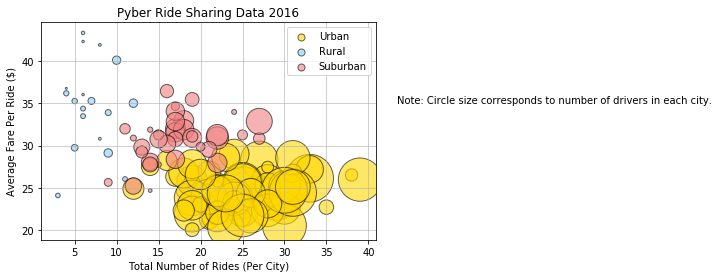

In [163]:
# Obtain the x and y coordinates for each of the three city types


# Build the scatter plots for each city types
Urban = plt.scatter(urban_sum["Total Rides"], urban_sum["Avg Fare"], s=urban_sum["Total Drivers"], c="gold", alpha=.6, edgecolors="black")
Rural = plt.scatter(rural_sum["Total Rides"], rural_sum["Avg Fare"], s=rural_sum["Total Drivers"], c="lightskyblue", alpha=.6, edgecolors="black")
Suburban = plt.scatter(suburban_sum["Total Rides"], suburban_sum["Avg Fare"], s=suburban_sum["Total Drivers"], c="lightcoral", alpha=.6, edgecolors="black")

# Incorporate the other graph properties
labels = ["Urban", "Rural", "Suburban"]
plt.grid(alpha=.75)
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare Per Ride ($)")
legend = plt.legend(markerscale=.5, labels=labels)

legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
# Create a legend

# Incorporate a text label regarding circle size
plt.figtext(s = "Note: Circle size corresponds to number of drivers in each city.", x=.95, y=.6)
# Save Figure
plt.savefig("Pyberdataplot.png")
plt.show()

In [151]:
# Show plot
plt.show()

## Total Fares by City Type

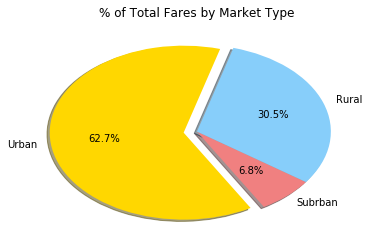

In [152]:
# Calculate Type Percents
citytype = data_df.groupby("type")
# Build Pie Chart
farepie = plt.pie(citytype["fare"].sum(), autopct = "%.1f%%", 
                  labels = ["Subrban", "Rural", "Urban"], 
                  colors = ["lightcoral", "lightskyblue", "gold"],
                  explode = [0,0,.1],
                  startangle=300, shadow=True)
plt.title("% of Total Fares by Market Type")


# Save Figure
plt.savefig("farepie.png")
plt.show()



## Total Rides by City Type

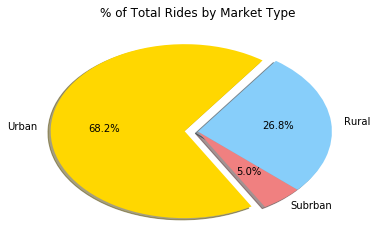

In [159]:
# Calculate Ride Percents

# Build Pie Chart
ridepie = plt.pie(citytype["ride_id"].sum(), autopct = "%.1f%%", 
                  labels = ["Subrban", "Rural", "Urban"], 
                  colors = ["lightcoral", "lightskyblue", "gold"],
                  explode = [0,0,.1],
                  startangle=300, shadow=True)
plt.title("% of Total Rides by Market Type")
# Save Figure
plt.savefig("ridepie.png")
plt.show()


## Total Drivers by City Type

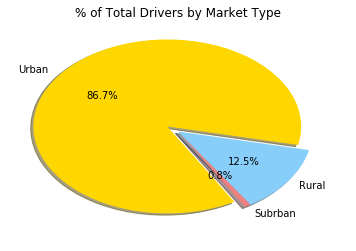

In [154]:
# Calculate Driver Percents

# Build Pie Charts
driverpie = plt.pie(citytype["driver_count"].sum(), autopct = "%.1f%%", 
                  labels = ["Subrban", "Rural", "Urban"], 
                  colors = ["lightcoral", "lightskyblue", "gold"],
                  explode = [0,0,.1],
                  startangle=300, shadow=True)
plt.title("% of Total Drivers by Market Type")
# Save Figure
plt.savefig("driverpie.png")
plt.show()

